In [1]:
#4 Algorithims will be used in this notebook KNN Logisitic regression Deep neural networks and Randomforest classifiers 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [3]:
df=pd.read_csv('heart.csv')

In [4]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


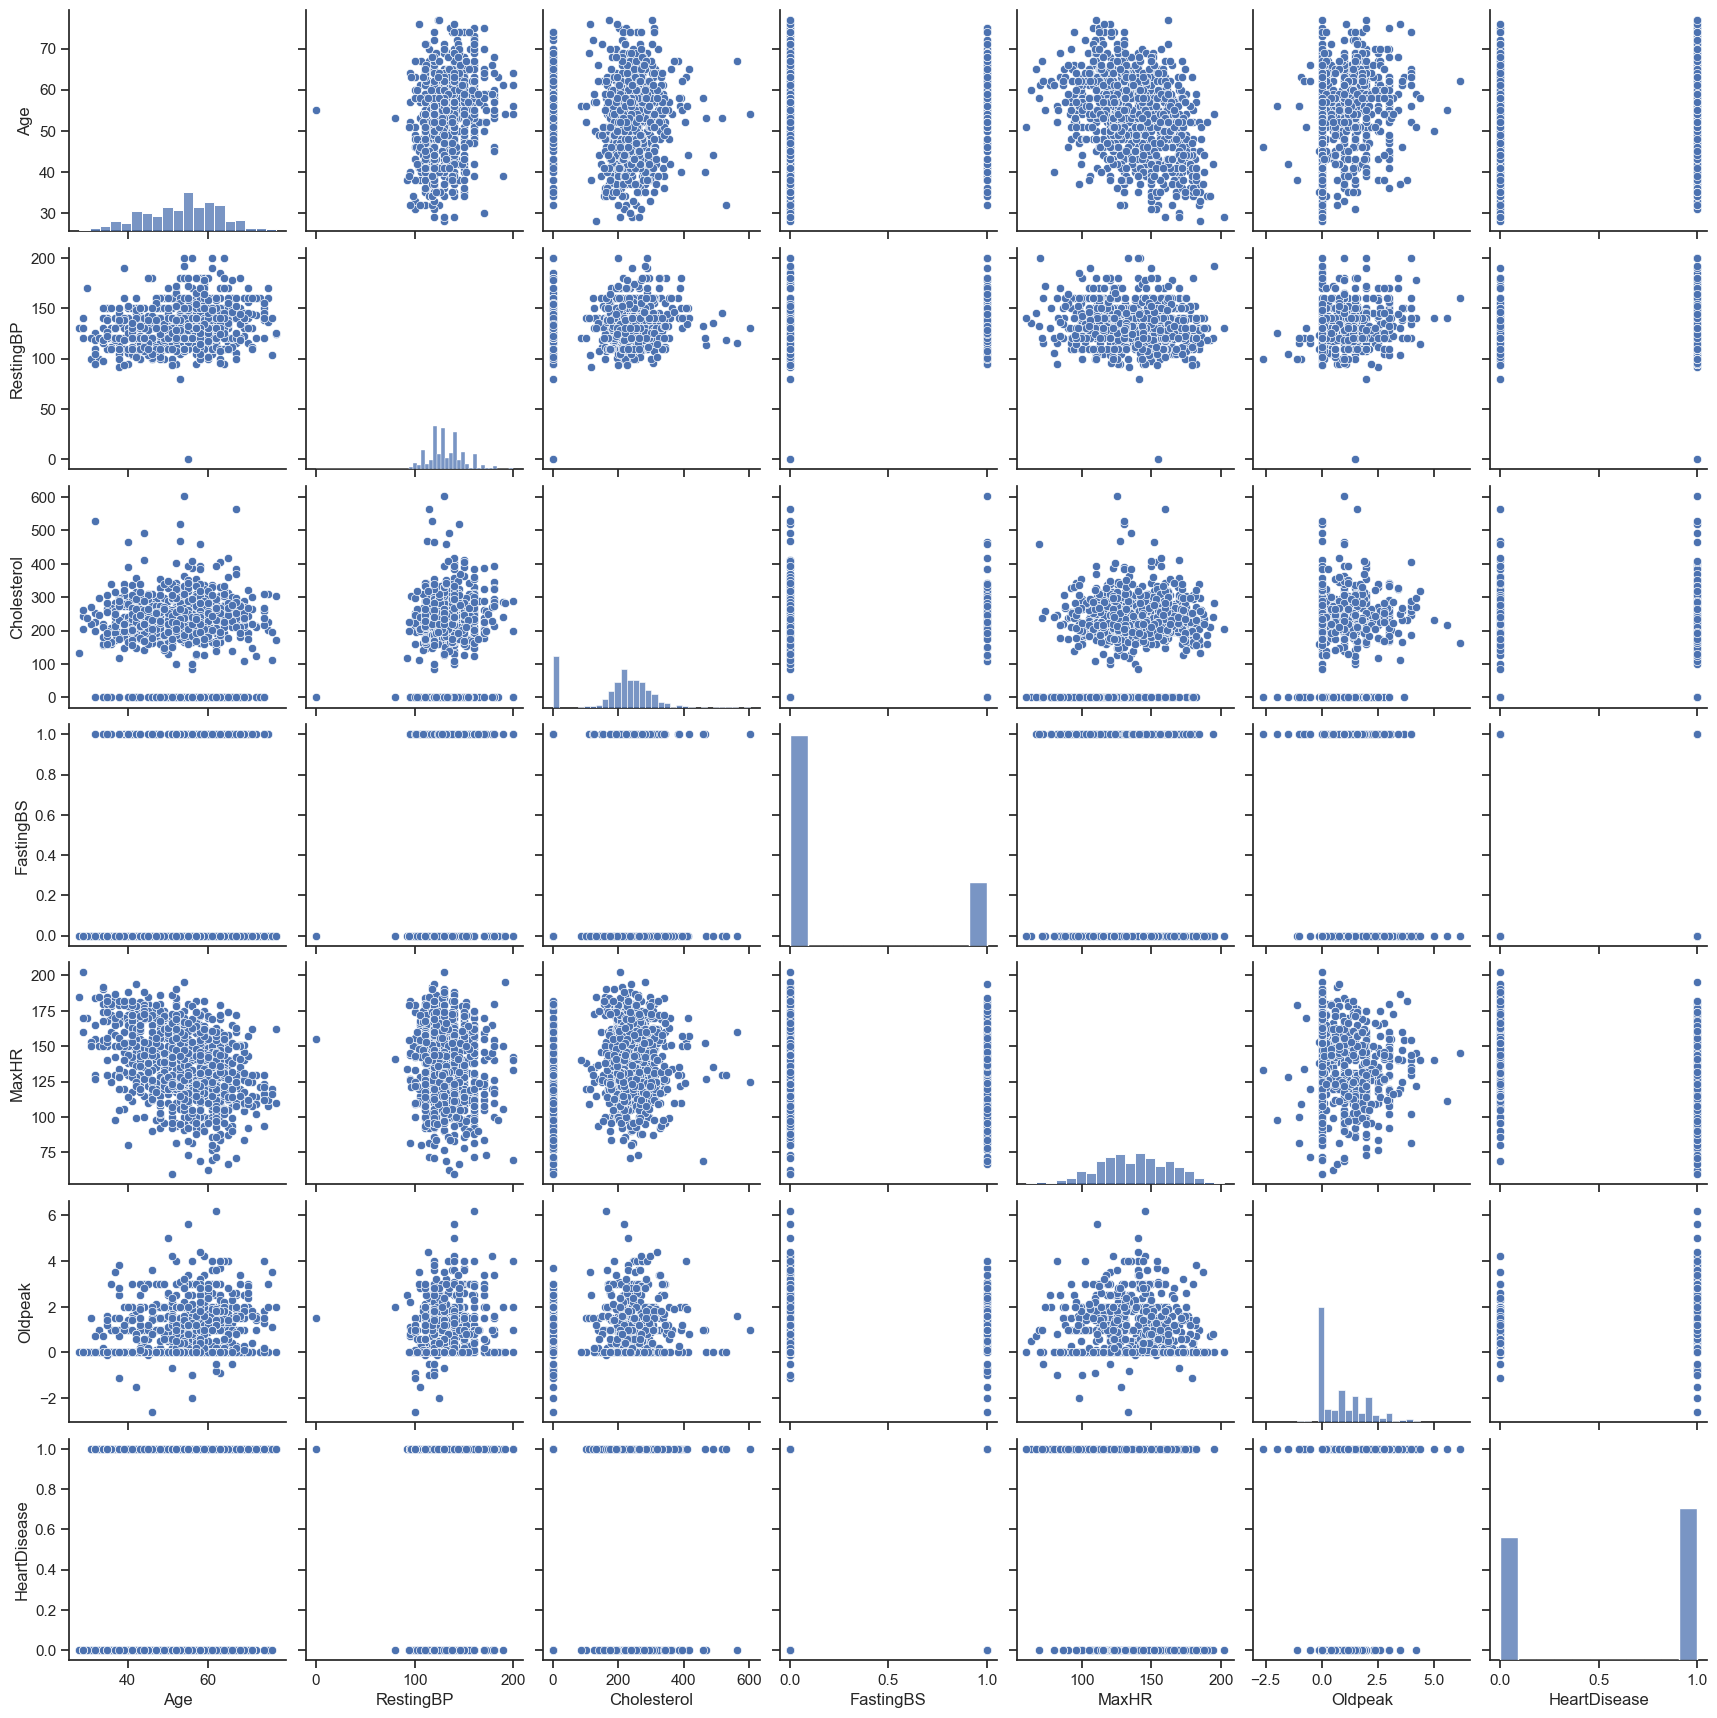

In [6]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(df)
plt.show()

In [7]:
df['HeartDisease'].value_counts()


HeartDisease
1    508
0    410
Name: count, dtype: int64

In [8]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['Age'] < Q1 - threshold * IQR) | (df['Age'] > Q3 + threshold * IQR)]
print (outliers)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [9]:
Q1 = df['RestingBP'].quantile(0.25)
Q3 = df['RestingBP'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['RestingBP'] < Q1 - threshold * IQR) | (df['RestingBP'] > Q3 + threshold * IQR)]
print (outliers)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
109   39   M           ATA        190          241          0     Normal   
123   58   F           ATA        180          393          0     Normal   
189   53   M           ASY        180          285          0         ST   
190   46   M           ASY        180          280          0         ST   
241   54   M           ASY        200          198          0     Normal   
274   45   F           ATA        180          295          0     Normal   
275   59   M           NAP        180          213          0     Normal   
278   57   F           ASY        180          347          0         ST   
314   53   M           ASY         80            0          0     Normal   
365   64   F           ASY        200            0          0     Normal   
372   63   M           ASY        185            0          0     Normal   
399   61   M           NAP        200            0          1         ST   
411   54   M

In [10]:
Q1 = df['MaxHR'].quantile(0.25)
Q3 = df['MaxHR'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['MaxHR'] < Q1 - threshold * IQR) | (df['MaxHR'] > Q3 + threshold * IQR)]
print (outliers)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
370   60   M           ASY        135            0          0     Normal   
390   51   M           ASY        140            0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
370     63              Y      0.5       Up             1  
390     60              N      0.0     Flat             1  


In [11]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5
outliers = df[(df['Cholesterol'] < Q1 - threshold * IQR) | (df['Cholesterol'] > Q3 + threshold * IQR)]
print (outliers)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
28    53   F           ATA        113          468          0     Normal   
30    53   M           NAP        145          518          0     Normal   
69    44   M           ASY        150          412          0     Normal   
76    32   M           ASY        118          529          0     Normal   
103   40   M           ASY        120          466          1     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   
616   67   F           NAP        115          564          0        LVH   
667   65   F           NAP        140          417          1        LVH   
796   56   F           ASY        134          409          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
28     127              N  

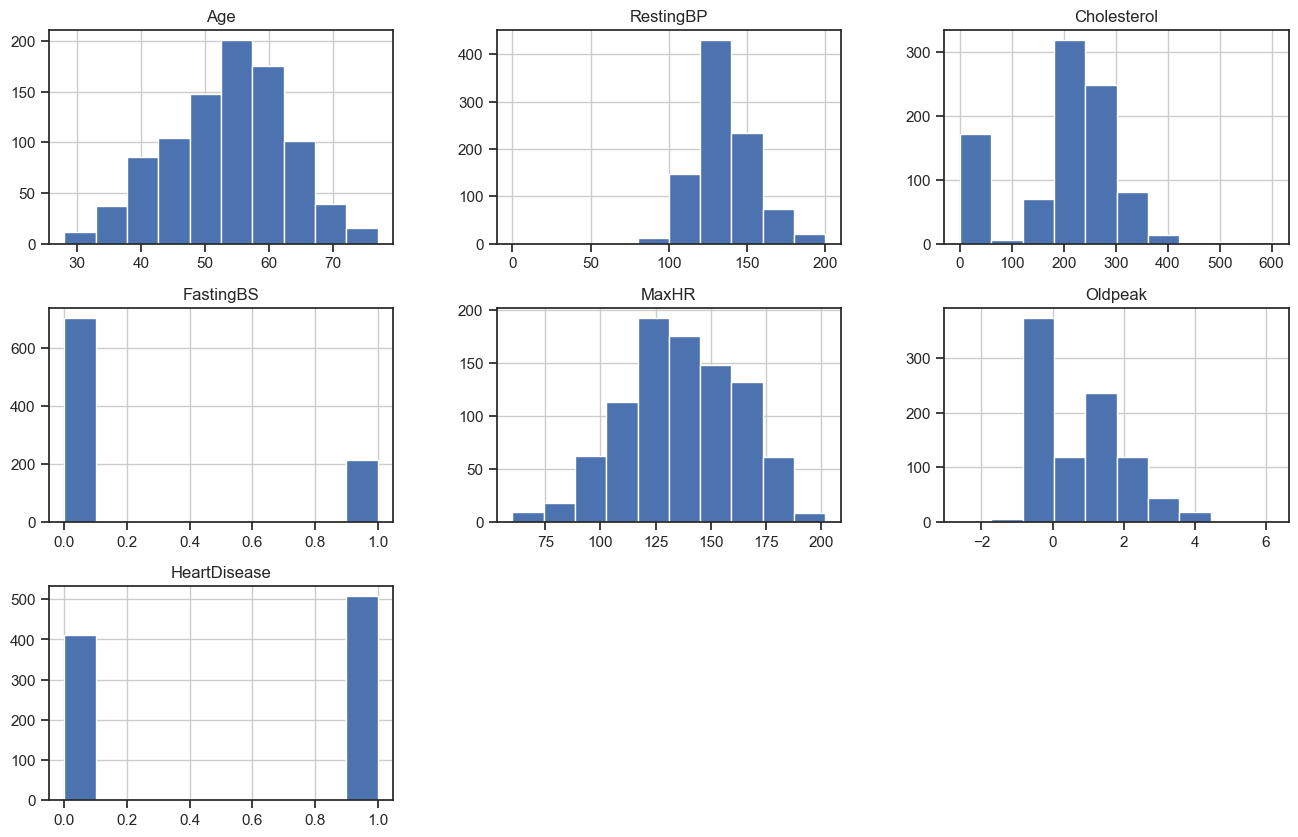

In [12]:
df.hist(figsize=(16,10))
plt.show()

Text(0.5, 1.0, 'The number of heart patients to healthy people')

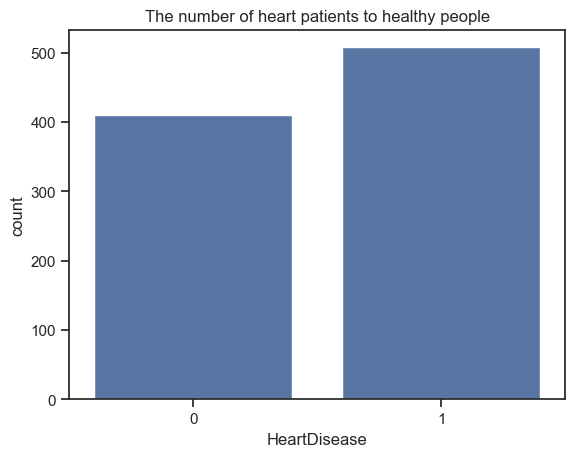

In [13]:
sns.countplot(data=df,x='HeartDisease')
plt.title('The number of heart patients to healthy people')

In [14]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

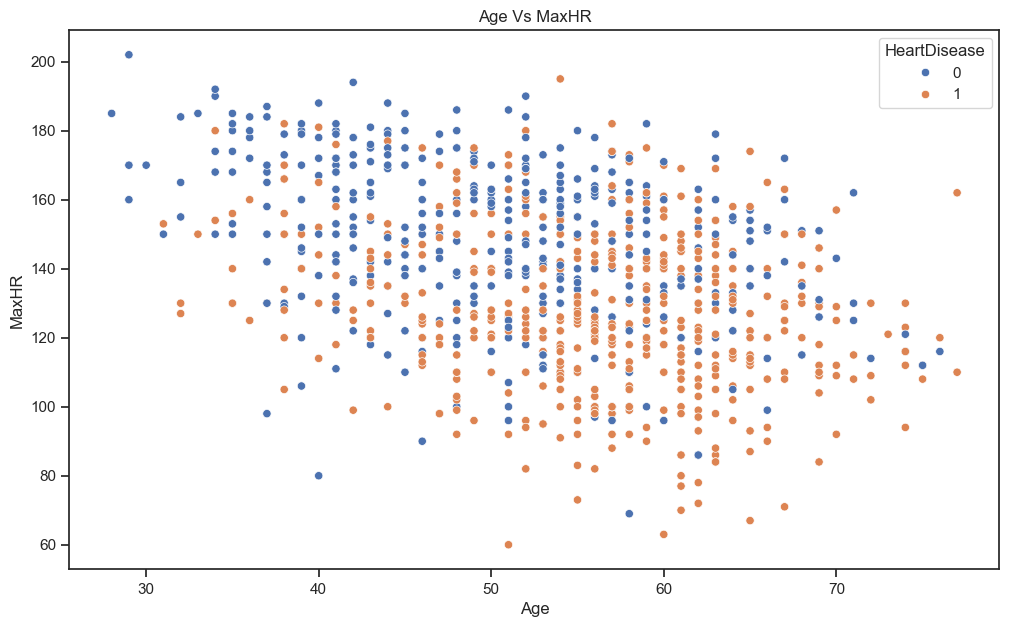

In [15]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Age',y='MaxHR',data=df,hue='HeartDisease')
plt.title('Age Vs MaxHR' );

In [16]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()

num_col = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Category Columns:", cat_col)
print("Numerical Columns:", num_col)

Category Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

print("Columns before one-hot encoding:", df.columns)

df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

print("Columns after one-hot encoding:", df.columns)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Columns before one-hot encoding: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Columns after one-hot encoding: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')
Accuracy: 0.77
Confusion Matrix:
[[333  67]
 [143 357]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       400
           1       0.84      0.71      0.77       500

    accuracy                           0.77       900
   macro avg       0.77      0.77      0.77    

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers



X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),   
    layers.Dense(16, activation='relu'),  
        layers.Dense(16, activation='relu'),    

    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.round(y_pred_probs)

y_pred = np.squeeze(y_pred)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Epoch 1/20
19/19 [==============================] - 3s 27ms/step - loss: 0.6486 - accuracy: 0.6763 - val_loss: 0.5549 - val_accuracy: 0.8503
Epoch 2/20
19/19 [==============================] - 0s 7ms/step - loss: 0.4727 - accuracy: 0.8603 - val_loss: 0.4222 - val_accuracy: 0.8435
Epoch 3/20
19/19 [==============================] - 0s 8ms/step - loss: 0.3521 - accuracy: 0.8825 - val_loss: 0.3744 - val_accuracy: 0.8367
Epoch 4/20
19/19 [==============================] - 0s 10ms/step - loss: 0.3085 - accuracy: 0.8893 - val_loss: 0.3782 - val_accuracy: 0.8435
Epoch 5/20
19/19 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.8893 - val_loss: 0.3954 - val_accuracy: 0.8299
Epoch 6/20
19/19 [==============================] - 0s 7ms/step - loss: 0.2801 - accuracy: 0.8859 - val_loss: 0.3887 - val_accuracy: 0.8435
Epoch 7/20
19/19 [==============================] - 0s 7ms/step - loss: 0.2714 - accuracy: 0.8944 - val_loss: 0.3933 - val_accuracy: 0.8435
Epoch 8/20
19/19 [

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.88
Confusion Matrix:
[[67 10]
 [12 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)  

knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.85
Confusion Matrix:
[[69 18]
 [10 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83        87
           1       0.83      0.90      0.86        97

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [21]:
y_train


316    1
82     1
645    1
116    1
188    0
      ..
289    0
109    0
907    1
480    1
688    0
Name: HeartDisease, Length: 734, dtype: int64

In [22]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
316,57,105,0,1,148,0.3,False,True,False,False,True,False,False,True,False,True,False,False,True,False
82,63,150,223,0,115,0.0,False,True,True,False,False,False,False,True,False,True,False,False,True,False
645,57,128,229,0,150,0.4,False,True,False,False,True,False,True,False,False,True,False,False,True,False
116,38,120,282,0,170,0.0,False,True,True,False,False,False,False,True,False,True,False,False,True,False
188,50,120,328,0,110,1.0,True,False,True,False,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,36,120,166,0,180,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
109,39,190,241,0,106,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
907,44,120,169,0,144,2.8,False,True,True,False,False,False,False,True,False,False,True,True,False,False
480,58,126,0,1,110,2.0,False,True,False,True,False,False,False,True,False,False,True,False,True,False


In [23]:
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
333,40,95,0,1,144,0.0,False,True,True,False,False,False,False,False,True,True,False,False,False,True
284,42,140,358,0,170,0.0,False,True,True,False,False,False,False,True,False,True,False,False,False,True
901,58,170,225,1,146,2.8,True,False,True,False,False,False,True,False,False,False,True,False,True,False
770,46,105,204,0,172,0.0,True,False,False,True,False,False,False,True,False,True,False,False,False,True
270,45,120,225,0,140,0.0,False,True,True,False,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,53,144,300,1,128,1.5,False,True,True,False,False,False,False,False,True,False,True,False,True,False
785,69,160,234,1,131,0.1,False,True,False,False,False,True,True,False,False,True,False,False,True,False
396,62,140,0,1,143,0.0,True,False,False,False,False,True,False,True,False,True,False,False,True,False
25,36,130,209,0,178,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [24]:
y_test

333    1
284    0
901    1
770    0
270    0
      ..
607    1
785    0
396    1
25     0
810    0
Name: HeartDisease, Length: 184, dtype: int64